Final Project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px

*Reading the csv file

In [3]:
student= pd.read_csv('student.csv')
student

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [4]:
selected_columns = ['Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Grade', 'Sports_activity','Additional_Work']

stu_narrowed = student[selected_columns]
stu_narrowed

,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Grade,Sports_activity,Additional_Work
0,0,Always,Yes,Yes,No,AA,No,Yes
1,0,Always,Yes,No,Yes,AA,No,Yes
2,2,Never,No,No,No,AA,No,No
3,2,Always,No,Yes,No,AA,No,Yes
4,12,Always,Yes,No,Yes,AA,No,No
...,...,...,...,...,...,...,...,...
140,0,Always,No,Yes,No,CC,Yes,Yes
141,0,Never,No,Yes,Yes,CC,No,No
142,0,Always,Yes,No,No,AA,No,No
143,12,Sometimes,No,Yes,No,CB,Yes,Yes


#converting the double letter grades into broader categories. This will help to create a more readible figure.

#removing rows with 6 as the 'notes' and 'Listening_in_Class'

#removing the row with 3 as the value for 'Attendance'


In [15]:
new_grade = {
    'AA': 'Excellent',
    'BA': 'Good',
    'BB': 'Good',
    'CB': 'Average',
    'CC': 'Average',
    'DC': 'Below Average',
    'DD': 'Below Average',
    'Fail': 'Fail'
}


stu_clean = stu_narrowed[stu_narrowed['Notes'] != '6']
stu_clean = stu_clean[stu_clean['Listening_in_Class'] != '6']
stu_clean = stu_clean[stu_clean['Attendance'] != '3']

stu_clean['Grade'] = stu_clean['Grade'].map(new_grade)

stu_clean=stu_clean.rename(columns={'Listening_in_Class': 'Listening in Class'})

print(stu_clean)

     Weekly_Study_Hours Attendance Reading Notes Listening in Class  \
0                     0     Always     Yes   Yes                 No   
1                     0     Always     Yes    No                Yes   
2                     2      Never      No    No                 No   
3                     2     Always      No   Yes                 No   
4                    12     Always     Yes    No                Yes   
..                  ...        ...     ...   ...                ...   
140                   0     Always      No   Yes                 No   
141                   0      Never      No   Yes                Yes   
142                   0     Always     Yes    No                 No   
143                  12  Sometimes      No   Yes                 No   
144                  12     Always     Yes    No                Yes   

         Grade Sports_activity Additional_Work  
0    Excellent              No             Yes  
1    Excellent              No             Yes  


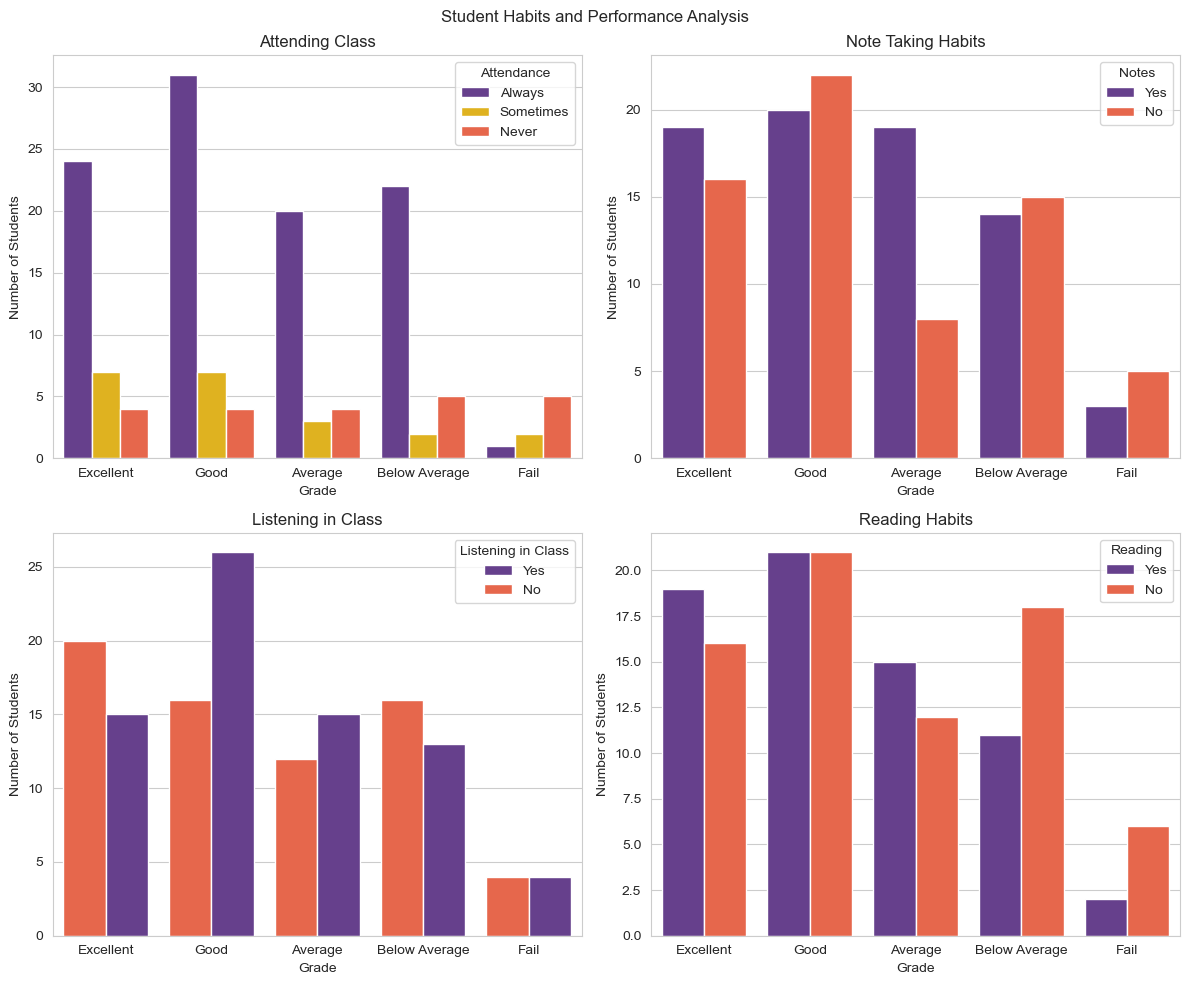

In [22]:

# Defining the order of grades
grade_order = ['Excellent', 'Good', 'Average', 'Below Average', 'Fail']

# Setting background to whitegrid 
sns.set_style("whitegrid")

# Creating custom color palettes and setting the order for each subplot
attendance_palette = ["#663399", "#FFC300", "#FF5733"]  
notes_palette = ["#663399", "#FF5733"]             
listening_palette = ["#FF5733", "#663399"]         
reading_palette = ["#663399", "#FF5733"]           

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Creating a plot for each variable, and also adding the custom color paletted
sns.countplot(data=stu_clean, x="Grade", hue="Attendance", order=grade_order, ax=axes[0, 0], palette=attendance_palette)
sns.countplot(data=stu_clean, x="Grade", hue="Notes", order=grade_order, ax=axes[0, 1], palette=notes_palette)
sns.countplot(data=stu_clean, x="Grade", hue="Listening in Class", order=grade_order, ax=axes[1, 0], palette=listening_palette)
sns.countplot(data=stu_clean, x="Grade", hue="Reading", order=grade_order, ax=axes[1, 1], palette=reading_palette)

# Adding titles to each subplot
axes[0, 0].set_title('Attending Class')
axes[0, 1].set_title('Note Taking Habits')
axes[1, 0].set_title('Listening in Class')
axes[1, 1].set_title('Reading Habits')

# Creating labels for all of the subplots
for ax in axes.flat:
    ax.set_xlabel('Grade')
    ax.set_ylabel('Number of Students')

# Changing the order of legend labels for 'Listening in Class' subplot
handles, labels = axes[1, 0].get_legend_handles_labels()
new_labels = ['Yes', 'No']  # Define the desired order of legend labels
new_handles = [handles[1], handles[0]]  # Change the order of handles
axes[1, 0].legend(new_handles, new_labels, title="Listening in Class")
# Changing the order of legend labels for 'Attending Class' subplot
handles, labels = axes[0, 0].get_legend_handles_labels()
new_labels = ['Always', 'Sometimes', 'Never']  # Define the desired order of legend labels
axes[0, 0].legend(handles, new_labels, title="Attendance")

# Add a title for the entire figure
plt.suptitle("Student Habits and Performance Analysis")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Save the plot with a white background
fig.savefig("student_performance_analysis.jpg", facecolor='white')